<a href="https://colab.research.google.com/github/artyomchervov/zadanie1/blob/master/lava3new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # для построения графиков


In [23]:
url = "https://so-ups.ru/index.php?id=972&tx_ms1cdu_pi1%5Bkpo%5D=540000&tx_ms1cdu_pi1%5Bdt%5D=15.05.2020"
id_table = 0
df_power = pd.read_html(url, header = 0, index_col = 0)[id_table]

df_power

,Мощность генерации (МВт),Мощность потребления (МВт)
Время Мск,,
15-05-2020 00:00,3919,3849
15-05-2020 01:00,4295,4008
15-05-2020 02:00,4545,4113
15-05-2020 03:00,4732,4205
15-05-2020 04:00,4641,4119
15-05-2020 05:00,4521,4002
15-05-2020 06:00,4511,3979
15-05-2020 07:00,4524,3978
15-05-2020 08:00,4438,3906


In [24]:
df_power = (pd.read_html("https://so-ups.ru/index.php?id=972&tx_ms1cdu_pi1%5Bkpo%5D=540000&tx_ms1cdu_pi1%5Bdt%5D=15.05.2020", header = 0, index_col = 0)[id_table]).iloc[: - 1]
df_2 = (pd.read_html("https://so-ups.ru/index.php?id=972&tx_ms1cdu_pi1%5Bkpo%5D=540000&tx_ms1cdu_pi1%5Bdt%5D=16.05.2020", header = 0, index_col = 0)[id_table]).iloc[: - 1]
df_3 = (pd.read_html("https://so-ups.ru/index.php?id=972&tx_ms1cdu_pi1%5Bkpo%5D=540000&tx_ms1cdu_pi1%5Bdt%5D=17.05.2020", header = 0, index_col = 0)[id_table]).iloc[: - 1]

df_power = df_power.append(df_2)
df_power = df_power.append(df_3)
df_power3=df_power.copy()

df_power


,Мощность генерации (МВт),Мощность потребления (МВт)
Время Мск,,
15-05-2020 00:00,3919,3849
15-05-2020 01:00,4295,4008
15-05-2020 02:00,4545,4113
15-05-2020 03:00,4732,4205
15-05-2020 04:00,4641,4119
...,...,...
17-05-2020 19:00,3805,3471
17-05-2020 20:00,3790,3440
17-05-2020 21:00,3772,3406


In [25]:
# 4. Аналогично добавим к данным частоту
id_table = 0
df_freq = (pd.read_html("https://so-ups.ru/index.php?id=971&tx_ms1cdu_pi1%5Bkpo%5D=540000&tx_ms1cdu_pi1%5Bdt%5D=15.05.2020", header = 0, index_col = 0)[id_table]).iloc[:-1]
df_freq = (df_freq.append(pd.read_html("https://so-ups.ru/index.php?id=971&tx_ms1cdu_pi1%5Bkpo%5D=540000&tx_ms1cdu_pi1%5Bdt%5D=16.05.2020", header = 0, index_col = 0)[id_table])).iloc[:-1]
df_freq = (df_freq.append(pd.read_html("https://so-ups.ru/index.php?id=971&tx_ms1cdu_pi1%5Bkpo%5D=540000&tx_ms1cdu_pi1%5Bdt%5D=17.05.2020", header = 0, index_col = 0)[id_table])).iloc[:-1]

df_freq

,"Частота, Гц"
Время Мск,
15-05-2020 00:00,50.03
15-05-2020 01:00,49.96
15-05-2020 02:00,50.01
15-05-2020 03:00,50.04
15-05-2020 04:00,50.05
...,...
17-05-2020 19:00,50.01
17-05-2020 20:00,49.94
17-05-2020 21:00,50.04


In [26]:
# 5. Осталось совместить мощность и частоту
df_power_freq = df_power.join(df_freq)
df_power_freq


,Мощность генерации (МВт),Мощность потребления (МВт),"Частота, Гц"
Время Мск,,,
15-05-2020 00:00,3919,3849,50.03
15-05-2020 01:00,4295,4008,49.96
15-05-2020 02:00,4545,4113,50.01
15-05-2020 03:00,4732,4205,50.04
15-05-2020 04:00,4641,4119,50.05
...,...,...,...
17-05-2020 19:00,3805,3471,50.01
17-05-2020 20:00,3790,3440,49.94
17-05-2020 21:00,3772,3406,50.04


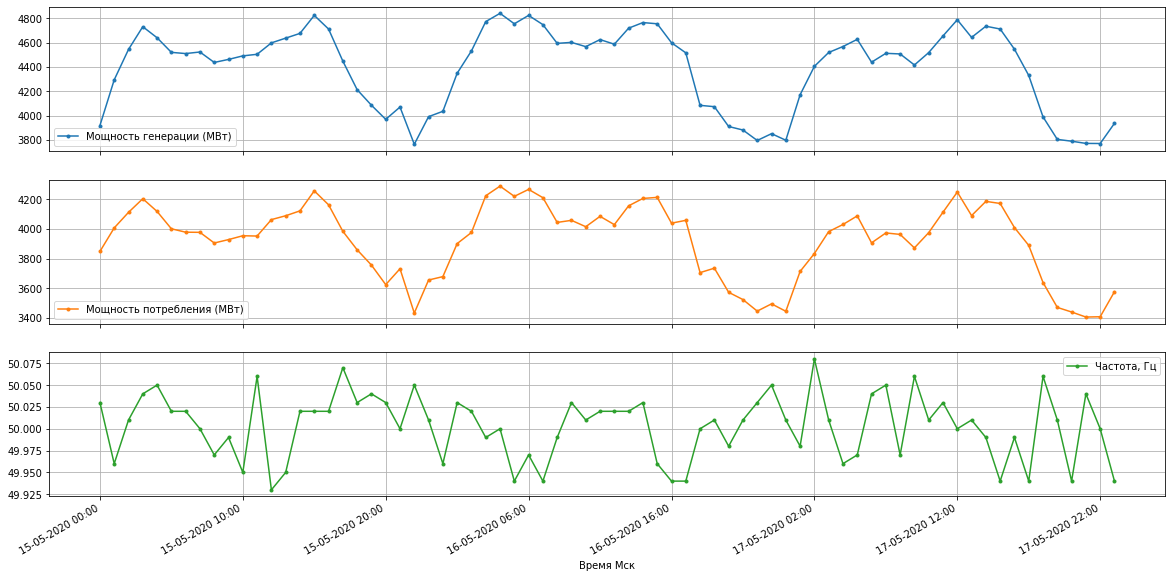

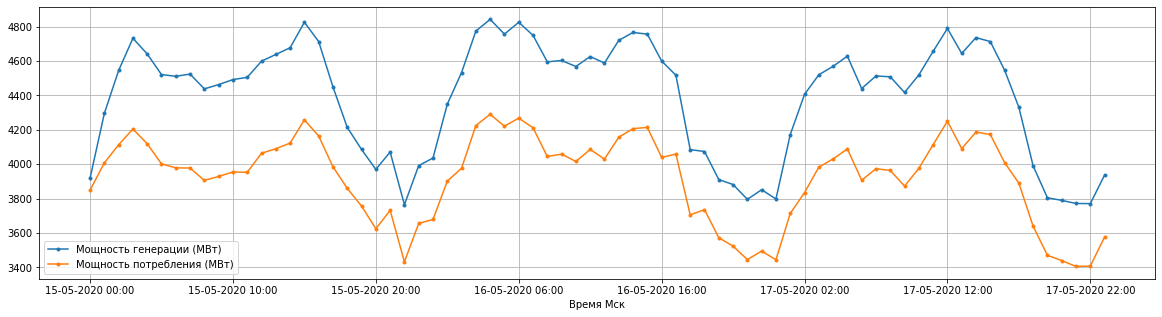

In [27]:
# 6. Построение графиков
import matplotlib.pyplot as plt

axes = df_power_freq.plot(marker='.', figsize=(20, 10), subplots = True)

for _ in axes:
  _.grid(True)

axes = df_power_freq[df_power_freq.columns[: -1]].plot(marker='.', figsize=(20, 5), subplots = False)
axes.grid(True)

In [28]:
df_power = df_power.sort_values(['Мощность генерации (МВт)'], ascending = True)
print(df_power)

                  Мощность генерации (МВт)  Мощность потребления (МВт)
Время Мск                                                             
15-05-2020 22:00                      3765                        3433
17-05-2020 22:00                      3771                        3408
17-05-2020 21:00                      3772                        3406
17-05-2020 20:00                      3790                        3440
16-05-2020 22:00                      3796                        3446
...                                    ...                         ...
16-05-2020 03:00                      4774                        4225
17-05-2020 12:00                      4789                        4250
16-05-2020 06:00                      4825                        4268
15-05-2020 15:00                      4825                        4258
16-05-2020 04:00                      4842                        4290

[72 rows x 2 columns]


In [29]:
df_power3

,Мощность генерации (МВт),Мощность потребления (МВт)
Время Мск,,
15-05-2020 00:00,3919,3849
15-05-2020 01:00,4295,4008
15-05-2020 02:00,4545,4113
15-05-2020 03:00,4732,4205
15-05-2020 04:00,4641,4119
...,...,...
17-05-2020 19:00,3805,3471
17-05-2020 20:00,3790,3440
17-05-2020 21:00,3772,3406


In [30]:
df_power3['Разность (МВт)'] = df_power3['Мощность генерации (МВт)'] - df_power3['Мощность потребления (МВт)'] 
df_power3


,Мощность генерации (МВт),Мощность потребления (МВт),Разность (МВт)
Время Мск,,,
15-05-2020 00:00,3919,3849,70
15-05-2020 01:00,4295,4008,287
15-05-2020 02:00,4545,4113,432
15-05-2020 03:00,4732,4205,527
15-05-2020 04:00,4641,4119,522
...,...,...,...
17-05-2020 19:00,3805,3471,334
17-05-2020 20:00,3790,3440,350
17-05-2020 21:00,3772,3406,366


In [31]:
# 9. Выборка данных по условию.
df_power3[df_power3['Мощность потребления (МВт)'] < 3500.]

,Мощность генерации (МВт),Мощность потребления (МВт),Разность (МВт)
Время Мск,,,
15-05-2020 22:00,3765,3433,332
16-05-2020 22:00,3796,3446,350
16-05-2020 23:00,3852,3495,357
17-05-2020 00:00,3798,3445,353
17-05-2020 19:00,3805,3471,334
17-05-2020 20:00,3790,3440,350
17-05-2020 21:00,3772,3406,366
17-05-2020 22:00,3771,3408,363


In [32]:
print('данные из десятой строки и второго столбца')
print(df_power3.iloc[9 , 1])

данные из десятой строки и второго столбца
3929


In [33]:
df_power3['Время Мск'] = df_power3.index

df_power3['Число'] = np.where(df_power3['Время Мск'].str.find('15-') >=0, '15', np.where(df_power3['Время Мск'].str.find('16-') >= 0, '16', np.where(df_power3['Время Мск'].str.find('17-') >= 0, '17', '?')))
df_power3['Число'] = df_power3['Число'].astype(int)
df_power3

,Мощность генерации (МВт),Мощность потребления (МВт),Разность (МВт),Время Мск,Число
Время Мск,,,,,
15-05-2020 00:00,3919,3849,70,15-05-2020 00:00,15
15-05-2020 01:00,4295,4008,287,15-05-2020 01:00,15
15-05-2020 02:00,4545,4113,432,15-05-2020 02:00,15
15-05-2020 03:00,4732,4205,527,15-05-2020 03:00,15
15-05-2020 04:00,4641,4119,522,15-05-2020 04:00,15
...,...,...,...,...,...
17-05-2020 19:00,3805,3471,334,17-05-2020 19:00,17
17-05-2020 20:00,3790,3440,350,17-05-2020 20:00,17
17-05-2020 21:00,3772,3406,366,17-05-2020 21:00,17


In [34]:
# Суммарная мощность
print(df_power3.groupby(['Число'])['Мощность генерации (МВт)'].sum())
print()

Число
15    105585
16    106803
17    103971
Name: Мощность генерации (МВт), dtype: int64



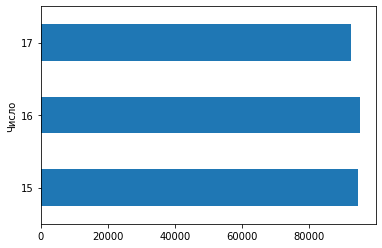

In [35]:
# 13. Гистограмма после группировки
df_power3.groupby(['Число'])['Мощность потребления (МВт)'].sum().plot(kind = 'barh')
print()

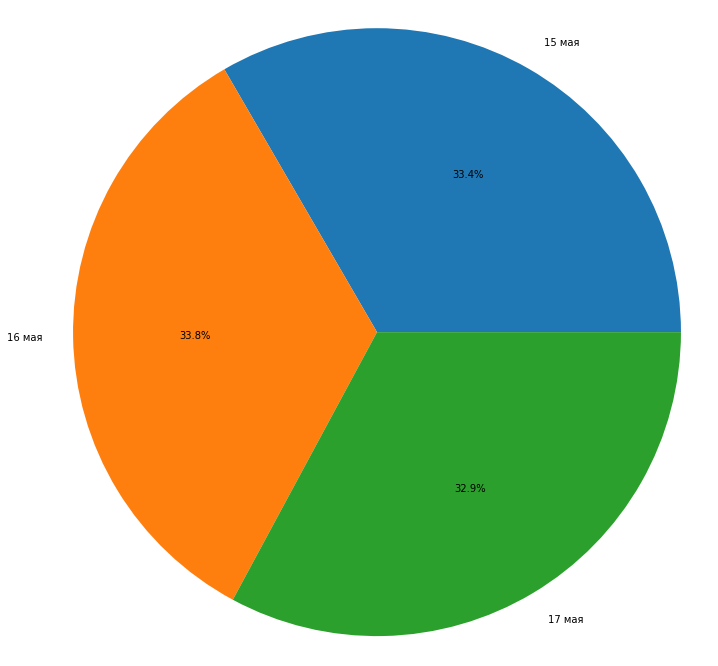

In [36]:
generation_sum = (df_power3.groupby(['Число'])['Мощность генерации (МВт)']).sum()

labels = ['15 мая', '16 мая', '17 мая']

fig1, ax1 = plt.subplots(figsize = (12, 12))
ax1.pie(generation_sum, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [0]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook


output_notebook() # чтобы график показывался прямо в блокноте

In [48]:
#Построение графика 
p = figure(plot_width = 1000, plot_height = 400)

# Список цветов по количеству дней
colors = ['magenta', 'red', 'yellow']

for day in range(15, 18):
  
  # Выбор из таблицы данных по выработке за нужное число 
  values = df_power3[df_power3['Число'] == day]['Мощность генерации (МВт)'].values 
  
  # Построение линий.
  p.line(np.arange(30), values, color = colors[day - 15], legend_label = str(day), line_width = 3)

  # Построение маркеров.
  p.circle(np.arange(30), values, color = colors[day - 15], alpha=0.5, size = 8)


show(p)
